In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [5]:
df = pd.read_csv('E:\\data Science\\datasets\\diabetes.csv')

In [23]:
df.head()
print(df.shape)

(768, 9)


In [7]:
df.shape

(768, 9)

In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.Outcome.value_counts()
# the traget variable is imbalanced

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [96]:
x = df.drop(['Outcome'],axis = 1)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [14]:
y = df.loc[:,'Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [15]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\dpzsony\anaconda3\lib\site-packages (0.6.1)
Note: you may need to restart the kernel to use updated packages.


In [77]:
from imblearn.over_sampling import SMOTE

In [78]:
smt = SMOTE(random_state = 42)
x_rev,y_rev = smt.fit_sample(x,y)

In [79]:
print(x_rev.shape)
print('\n')
print(y_rev.shape)

(1000, 8)


(1000,)


In [80]:
x_train,x_test,y_train,y_test = train_test_split(x_rev,y_rev,test_size = 0.30,random_state = 42)

In [81]:
print(y_train.shape)
print(x_train.shape)

(700,)
(700, 8)


In [82]:
print(y_train.value_counts())
print('\n')
print(y_test.value_counts())

0    351
1    349
Name: Outcome, dtype: int64


1    151
0    149
Name: Outcome, dtype: int64


In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [84]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 3)

In [85]:
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [86]:
y_pred = model.predict(x_test)

In [87]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [88]:
print(accuracy_score(y_test,y_pred))
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

0.7633333333333333


[[104  45]
 [ 26 125]]


              precision    recall  f1-score   support

           0       0.80      0.70      0.75       149
           1       0.74      0.83      0.78       151

    accuracy                           0.76       300
   macro avg       0.77      0.76      0.76       300
weighted avg       0.77      0.76      0.76       300



In [108]:
 ##### Choosing K VALUE ##############
    BY USING ELBOW METHOD LETS SELECT THE GOOD VALUE OF K
    # FOR SELECTING THE VALUE OF K WE HAVE TWO METHOD
    1. ERROR RATE
    2. ACCURACY RATE

IndentationError: unexpected indent (<ipython-input-108-793cd1bf11da>, line 2)

In [89]:
error_rate=[]
# (1,40) are the value for k that will be checked
for i in range (1,40):
    KNN = KNeighborsClassifier(n_neighbors = i)
    KNN.fit(x_train,y_train)
    KNN_pred = KNN.predict(x_test)
    error_rate.append(np.mean(KNN_pred != y_test))

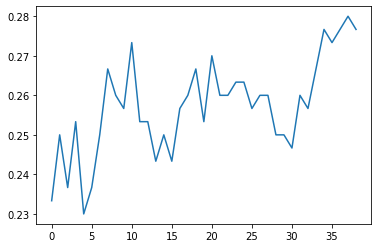

In [90]:
# now we will plot a graph between error_rate and K
plt.plot(error_rate)

In [ ]:
# from graph we can see that the best value of k is 5 as after that the error is increasing with the value of k.
# so now build the model with k=5

In [91]:
model1 = KNeighborsClassifier(n_neighbors = 5)

In [92]:
model1.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [93]:
Y_pred = model1.predict(x_test)

In [94]:
print(accuracy_score(y_test,Y_pred))
print('\n')
print(confusion_matrix(y_test,Y_pred))
print('\n')
print(classification_report(y_test,Y_pred))

0.77


[[102  47]
 [ 22 129]]


              precision    recall  f1-score   support

           0       0.82      0.68      0.75       149
           1       0.73      0.85      0.79       151

    accuracy                           0.77       300
   macro avg       0.78      0.77      0.77       300
weighted avg       0.78      0.77      0.77       300

